# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [28]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [29]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

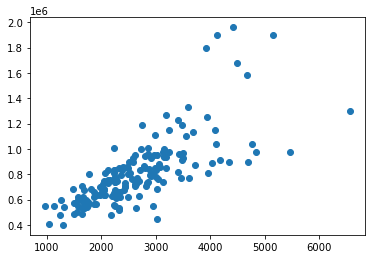

In [30]:
y = df[df['zipcode'] == 98005]['price']
x = df[df['zipcode'] == 98005]['sqft_living']

plt.scatter(x, y)

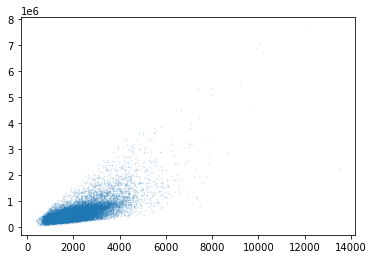

In [31]:
# sqft_living
# price

x = df['sqft_living']
y = df['price']

plt.scatter(x, y, alpha = .15, s= .4)

In [32]:
df[df['zipcode'] == 98005].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.293229,0.602608,0.740920,0.566596,0.435987,0.777308,0.427175,0.098636,NaN,0.529695,0.198970,0.674625,0.397516
bedrooms,0.293229,1.000000,0.362850,0.545460,0.299922,0.084771,0.302207,0.026695,-0.081983,NaN,0.218388,0.143646,0.275105,0.222452
bathrooms,0.602608,0.362850,1.000000,0.716835,0.383228,0.478232,0.620989,0.550833,0.041331,NaN,0.387685,0.226978,0.536440,0.345951
sqft_living,0.740920,0.545460,0.716835,1.000000,0.510779,0.426776,0.786090,0.401876,0.004121,NaN,0.499581,0.185618,0.658809,0.403712
sqft_lot,0.566596,0.299922,0.383228,0.510779,1.000000,0.321917,0.504037,0.166455,-0.013749,NaN,0.611847,0.283477,0.600156,0.619629
floors,0.435987,0.084771,0.478232,0.426776,0.321917,1.000000,0.652533,0.620710,-0.102883,NaN,0.388322,0.342794,0.418034,0.221950
sqft_above,0.777308,0.302207,0.620989,0.786090,0.504037,0.652533,1.000000,0.454368,0.079430,NaN,0.546579,0.259574,0.696711,0.399360
yr_built,0.427175,0.026695,0.550833,0.401876,0.166455,0.620710,0.454368,1.000000,-0.211315,NaN,0.238243,0.361009,0.318313,0.161520
yr_renovated,0.098636,-0.081983,0.041331,0.004121,-0.013749,-0.102883,0.079430,-0.211315,1.000000,NaN,0.040105,-0.041954,-0.081255,0.020770
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

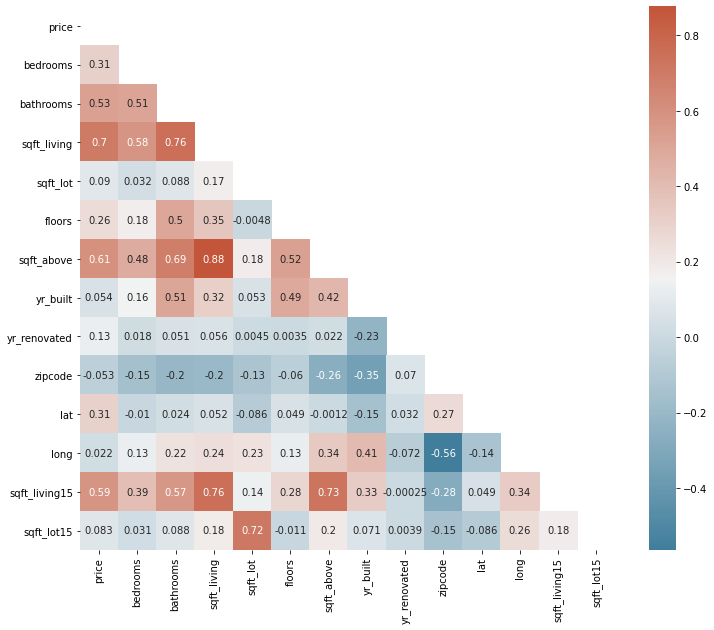

In [33]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [34]:
zipcodes = pd.get_dummies(df.zipcode)
zip_cat = pd.concat([df, zipcodes], axis=1)

In [35]:
# zip_price = pd.concat([df.price, df.sqft_living, zipcodes], axis=1) #grade_labels[0].astype('int64')

# # y = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].price
# # x = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].sqft_living

# # plt.scatter(x, y)
# # grade_set = list(set(zip_price[0]))

# # zip_price[(zip_price[0] == 7) & (zip_price[98001] == 1)]

# # x2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].sqft_living
# # y2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].price

# # plt.scatter(x2, y2)

# y3 = zip_price.price
# x3 = zip_price.drop('price', axis=1)

# lr = LinearRegression()

# x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=.2)

# lr.fit(x3_train, y3_train)

# lr.score(x3_test, y3_test) # ~.75 

# # try making the grade categorical

# grade_cat = zip_price#.drop(0, axis=1)
# grade_cat = pd.concat([grade_cat, pd.get_dummies(df.grade)], axis=1)

# y4 = grade_cat.price
# x4 = grade_cat.drop('price', axis=1)

# x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

# lr.fit(x4_train, y4_train)

# lr.score(x4_test, y4_test) # ~.77

# grade_cat

# price = y4_train
# preds = x4_train
# test_lm1 = OLS(price,preds)
# results = test_lm1.fit()
# results.summary()

# # lr.predict()
# # grade_cat

# y5 = grade_cat.price
# x5 = grade_cat.drop('price', axis=1)

# x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

# lr.fit(x4_train, y4_train)

# price = y5_train
# preds = x5_train
# test_lm1 = OLS(price,preds)
# results = test_lm1.fit()
# results.summary()

In [36]:
zip_cat.describe().astype(int)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
count,21597,21597,21597,21597,21597,21597,21597,21597,17755,21597,...,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597
mean,540296,3,2,2080,15099,1,1788,1970,83,98077,...,0,0,0,0,0,0,0,0,0,0
std,367368,0,0,918,41412,0,827,29,399,53,...,0,0,0,0,0,0,0,0,0,0
min,78000,1,0,370,520,1,370,1900,0,98001,...,0,0,0,0,0,0,0,0,0,0
25%,322000,3,1,1430,5040,1,1190,1951,0,98033,...,0,0,0,0,0,0,0,0,0,0
50%,450000,3,2,1910,7618,1,1560,1975,0,98065,...,0,0,0,0,0,0,0,0,0,0
75%,645000,4,2,2550,10685,2,2210,1997,0,98118,...,0,0,0,0,0,0,0,0,0,0
max,7700000,33,8,13540,1651359,3,9410,2015,2015,98199,...,1,1,1,1,1,1,1,1,1,1


In [37]:
box_df = zip_cat.copy()
box_df = box_df[['price', 'bedrooms', 'bathrooms', 'sqft_living']]
box_df.head()

,price,bedrooms,bathrooms,sqft_living
id,,,,
7129300520,221900.0,3,1.00,1180
6414100192,538000.0,3,2.25,2570
5631500400,180000.0,2,1.00,770
2487200875,604000.0,4,3.00,1960
1954400510,510000.0,3,2.00,1680


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


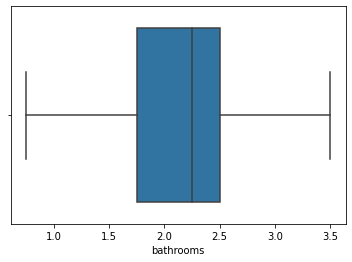

In [81]:
import seaborn as sns
sns.boxplot(box_df['bathrooms'], showfliers=False);


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


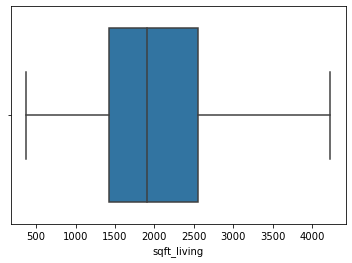

In [80]:
sns.boxplot(box_df['sqft_living'], showfliers=False);

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


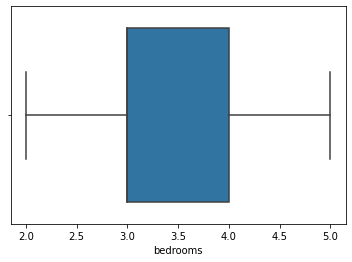

In [82]:
sns.boxplot(box_df['bedrooms'],showfliers=False);

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: This method only works with the ScalarFormatter

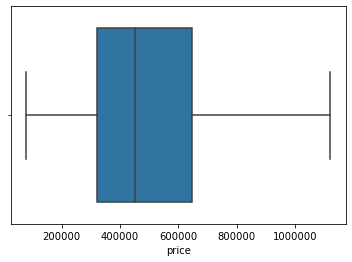

In [86]:
# plt.figure(figsize=(10,6))
ax = sns.boxplot(box_df['price'],showfliers=False)
plt.ticklabel_format(style='plain')



# plt.figure(figsize = (15,8))
# ax = sns.barplot(x = 'Date', y = 'Price',data = df)
# plt.xticks(rotation=45)

In [ ]:
lr = LinearRegression()
y6 = zip_cat.price
x6 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=.2)

lr.fit(x6_train, y6_train)

price = y6_train
preds = x6_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

#lr.score(x6_test, y6_test)

# bed + bath + zip + sqft ~.74
# x6.columns

In [40]:
lr.intercept_

-45089503372223.94

In [41]:
np.random.seed(42)
sample_pt = zip_cat.sample(1)
sample_pt_price = sample_pt.iloc[0,1]
sample = sample_pt.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

# Show my random sample off
print(f'Price of sample: ${sample_pt_price}')
sample

Price of sample: $132500.0


,bedrooms,bathrooms,sqft_living,98001,98002,98003,98004,98005,98006,98007,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
id,,,,,,,,,,,,,,,,,,,,,
6303401050,3,0.75,850,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        y_hat = lr7.predict(x7_test)
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

In [45]:
#x axis actual prices, y axis normalize predictions
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()
    
    x_axis = [] # actual price
    y_axis = [] # % error

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        
        y_hat = lr7.predict(x7_test)
        
        x_axis.append(y7_test)
        y_axis.append((y_hat-y7_test)/y7_test)# predicted price - acutal price / actual price
        
        plt.scatter(x_axis, y_axis, s=.1, alpha=.2)
        plt.xlim(0,1000000)
        plt.ylim(-1, 1)
        plt.xlabel('Home Price')
        plt.ticklabel_format(style='plain')
        plt.ylabel('Model Error')
        
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

([187923.48416819476,
  171985.2671620463,
  192104.42962464623,
  192419.88665982196,
  184670.5464400981],
 [0.7328802367968845,
  0.7513937306102974,
  0.7290616639429373,
  0.7323063152734648,
  0.733909453910988],
 [148941.1015625,
  139049.2578125,
  152797.984375,
  136745.9375,
  148564.75415039062])

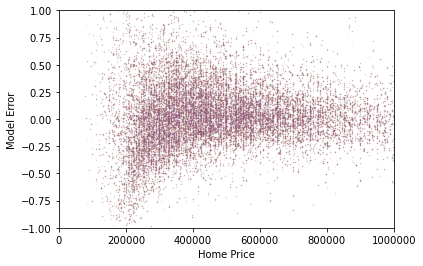

In [46]:
train_lr_randomly(data=zip_cat,sample_pt=sample, ntimes=5)

In [16]:
zip_cat.price.median()

450000.0

In [17]:
y7 = zip_cat.price
x7 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)


linreg = LinearRegression()
linreg.fit(x7_train, y7_train)
y_hat_train = linreg.predict(x7_train)
y_hat_test = linreg.predict(x7_test)
train_res = y_hat_train - y7_train
test_res = y_hat_test - y7_test
mse_train = mean_squared_error(y7_train, y_hat_train)
mse_test = mean_squared_error(y7_test, y_hat_test)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))

188010.5729354791
187923.48416819476


In [18]:
def price_predictor():
    beds = int(input('How many bedrooms?'))
    baths = int(input('How many bathrooms?'))
    sqft = int(input('How many square feet?'))
    zip_ = int(input('What is the zipcode?'))
    
    entry = pd.DataFrame(0, index=['sample'], columns=x6.columns)
    entry['bedrooms'] = beds
    entry['bathrooms'] = baths
    entry['sqft_living'] = sqft
    entry[zip_] = 1
    
    price_target = f'${round(float(lr.predict(entry)), 2)}'
    return price_target

price_predictor()

How many bedrooms?3
How many bathrooms?2
How many square feet?1200
What is the zipcode?98001


'$108125.2'

In [19]:
import folium
location = df.groupby('zipcode')[['lat', 'long']].mean()
long = location['long']
lat = location['lat']
price = df.groupby('zipcode')['price'].median()
zip_1 = location.index

base_map = folium.Map([47.6, -122.25], zoom_start=11)

points = list(zip(lat, long, price, zip_1))
for p in points:
    lat = p[0]
    long = p[1]
    zip_1 = p[3]
    price = f'{zip_1} : ${str(p[2])}'
#     marker = folium.Marker(location=[lat, long])
    popup = folium.Popup(price, parse_html=True)
    
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)
    
#     marker.add_to(base_map)

base_map

# long

In [20]:
y = trimmed.price
X = trimmed.drop('price', axis=1)

trimmed.columns # sqft + zipcode

NameError: name 'trimmed' is not defined

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
model.score(X,y)

In [ ]:
x_var = df[['sqft_living']] # grade
y_var = df.price

X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=.2)

In [ ]:
model.fit(X_train,y_train)
model.score(X_test, y_test) # training = 0.49938431424133234

# USE LABEL ENCODING FOR GRADE

In [ ]:
le = LabelEncoder()

# seperate value for grade

grade_labels = df.grade.str.split(' ', 1, expand=True)
new_df = pd.concat([df.price, df.sqft_living, df.zipcode.astype('object'), grade_labels[0].astype('int64')], axis=1)

x = new_df.drop('price', axis=1)
y = new_df.price

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

model.fit(X_train,y_train)
model.score(X_test, y_test)

model.coef_

In [ ]:
# sss = new_df.reset_index().drop('id', axis=1)

In [ ]:
new_df.groupby('zipcode').count()

In [ ]:
plt.scatter(df.long, df.lat, s=1)